<a href="https://colab.research.google.com/github/piero0090/Tesis-SeminarioII/blob/main/Clustering_football_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de librerías** ⏺

In [1]:
# Tratamiento de datos
# =========================================================================
import numpy as np
import pandas as pd
# Gráficos
# =========================================================================
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# =========================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
# Configuración warnings
# =========================================================================
import warnings
warnings.filterwarnings('ignore')
# =========================================================================
plt.style.use('ggplot')
#pd.set_option('max_columns',200)
pd.options.display.max_columns = 200
from itertools import cycle, islice

# **Lecturas de datos** ✅

In [2]:
datos = pd.read_csv('/content/DatosII.csv')
datos.head()

,Nombre,Altura,Nac,Sueldo neto,Club,División,Edad,Posición,Valor de traspaso,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace,Rec,Inf,RM
0,Alexandre Lacazette,175 cm,FRA,490.000 € p/m,Arsenal,Premier Division inglesa,30,DL (C),25M € - 30M €,12,12,14,1,11,13,15,15,14,3,2,5,3,3,17,14,15,14,3,15,14,12,5,3,12,15,4,14,3,15,5,12,16,14,15,14,2,7,11,13,2,15,10,1,10,15,14,- - -,Est,NaN
1,André Onana,192 cm,CMR,74.000 € p/m,Ajax,Eredivisie,25,POR,20M € - 29M €,8,13,15,15,9,2,12,14,15,2,15,4,15,16,13,13,3,2,15,16,3,13,3,14,12,12,5,13,15,15,2,15,2,14,10,14,13,15,2,5,15,13,16,15,9,15,12,- - -,San,NaN
2,Pavel Kadeřábek,182 cm,CZE,93.000 € p/m,Hoffenheim,Bundesliga,29,DF/CR/ME/MP (D),"7,6M € - 9,4M €",10,16,15,1,7,11,10,10,8,15,2,7,2,4,16,17,9,11,3,14,11,10,11,3,12,14,3,14,4,16,13,16,14,9,10,13,2,11,14,11,2,10,11,2,13,11,14,- - -,Seg,NaN
3,Richarlison,181 cm,BRA,297.000 € p/m,Everton,Premier Division inglesa,24,"MP (DI), DL (C)",83M € - 119M €,10,15,13,2,9,11,15,14,12,8,3,10,3,1,16,17,14,15,3,15,12,12,6,2,9,12,3,13,1,12,12,14,14,10,13,12,2,10,11,14,3,12,11,2,15,14,15,- - -,Seg,NaN
4,Bernd Leno,190 cm,GER,270.000 € p/m,Arsenal,Premier Division inglesa,29,POR,27M € - 32M €,7,10,14,17,5,3,9,4,11,2,15,2,12,16,10,12,2,2,17,14,1,10,2,14,9,16,13,12,13,14,2,14,6,10,10,12,12,13,1,6,15,14,14,13,8,16,13,- - -,Est,NaN


In [3]:
datos.describe()

,Edad,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace,RM
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.00000,0.0
mean,20.122675,8.438825,11.522349,9.229690,2.956281,5.895595,6.779445,9.611746,8.304405,8.680261,4.745514,3.031974,5.752039,2.829690,3.039478,10.057096,9.360848,6.903100,7.900816,3.312561,12.419902,5.453507,9.745188,7.207178,2.978467,7.699184,9.277325,2.988581,7.904731,2.663622,8.908646,8.289396,11.176509,8.112561,11.005873,10.044698,8.582055,2.855791,8.449918,6.677325,8.065905,3.245677,9.201631,9.492659,3.128548,10.472431,11.338010,11.80783,NaN
std,4.951655,3.519378,2.362036,3.730751,2.799206,3.308674,3.655395,3.738777,3.892945,3.592159,3.320731,2.863568,3.214866,2.496675,2.905621,3.545168,4.000526,3.886032,4.338630,3.553607,2.685822,3.843530,3.128972,3.940792,2.720953,3.604041,3.722693,2.849500,3.991022,2.048545,3.680643,4.365420,4.164593,4.108283,2.486510,3.528922,3.438931,2.528445,3.572842,3.871967,3.945562,3.279317,3.356115,3.556981,3.149317,3.149346,2.323806,2.34881,NaN
min,15.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.00000,NaN
25%,16.000000,6.000000,10.000000,7.000000,1.000000,4.000000,4.000000,7.000000,5.000000,6.000000,2.000000,1.000000,3.000000,1.000000,1.000000,7.000000,6.000000,4.000000,4.000000,1.000000,11.000000,2.000000,7.000000,4.000000,1.000000,5.000000,6.000000,1.000000,5.000000,1.000000,6.000000,5.000000,8.000000,5.000000,9.000000,8.000000,6.000000,1.000000,6.000000,3.000000,5.000000,1.000000,7.000000,7.000000,1.000000,8.000000,10.000000,11.00000,NaN
50%,18.000000,9.000000,12.000000,9.000000,2.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,2.000000,5.000000,2.000000,2.000000,10.000000,10.000000,7.000000,8.000000,2.000000,13.000000,5.000000,10.000000,7.000000,2.000000,8.000000,8.000000,2.000000,7.000000,2.000000,8.000000,9.000000,12.000000,8.000000,12.000000,11.000000,9.000000,2.000000,8.000000,7.000000,8.000000,2.000000,9.000000,9.000000,2.000000,11.000000,12.000000,12.00000,NaN
75%,23.000000,11.000000,13.000000,12.000000,3.000000,8.000000,10.000000,12.000000,12.000000,12.000000,7.000000,3.000000,7.000000,3.000000,3.000000,13.000000,13.000000,10.000000,12.000000,3.000000,14.000000,8.000000,12.000000,10.000000,3.000000,10.000000,13.000000,3.000000,11.000000,3.000000,12.000000,12.000000,14.000000,12.000000,13.000000,13.000000,11.000000,3.000000,12.000000,10.000000,11.000000,3.000000,12.000000,12.000000,3.000000,13.000000,13.000000,13.00000,NaN
max,40.000000,18.000000,18.000000,20.000000,17.000000,18.000000,17.000000,18.000000,20.000000,18.000000,19.000000,17.000000,18.000000,17.000000,19.000000,20.000000,19.000000,17.000000,17.000000,18.000000,20.000000,20.000000,17.000000,16.000000,17.000000,20.000000,19.000000,18.000000,19.000000,17.000000,19.000000,18.000000,20.000000,19.000000,17.000000,17.000000,18.000000,18.000000,16.000000,17.000000,19.000000,16.000000,18.000000,20.000000,19.000000,20.000000,18.000000,20.00000,NaN


# **Transformación del dataset** 🔼

In [4]:
#Eliminar columnas inncesarias
datos.drop(['RM','Inf','Rec'],axis=1, inplace=True)

In [5]:
#Guardar columnas datos informativos.
#datosInf=datos.drop(columns=datos.iloc[:,9:])
#datosInf.head()

In [6]:
#Transformar datos informativos
#Cambio de nombre a las Ligas
div1=['Serie A','Premier League','Ligue 1','La Liga','Bundesliga','La Liga',
      'Eredivisie']
div2=['Serie A italiana','Premier Division inglesa','Ligue 1 Uber Eats',
      'Primera División Federación B española','Bundesliga',
      'Primera División Federación A española','Eredivisie']
datos['División']=datos['División'].replace(div2,div1)

In [7]:
#Cambio de formato columna de Altura
datos['Altura'] = datos['Altura'].str.extract('(\d+)').astype(int)

In [8]:
#Cambio de formato de sueldo neto
datos['Sueldo neto'] = datos['Sueldo neto'].replace('N/D',np.nan)
datos['Sueldo neto'].fillna(method='ffill',inplace=True)

In [9]:
#Elimar filas inncesarias de Valor de traspaso
datos.drop(datos[(datos['Valor de traspaso']=='0 €')|(datos['Valor de traspaso']=='No a la venta')].index, inplace=True)

In [10]:
datos.head()

,Nombre,Altura,Nac,Sueldo neto,Club,División,Edad,Posición,Valor de traspaso,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,Sq L,Pue,Cór,Saq,SAL,Sac,Res,Rem,Reg,Ref,Fís,Pen,Pas,Mar,Mdo,Lid,JEq,Puñ,Fue,Exc,Equ,Ent,Det,Dmq,Dec,Ctr,Cnc,Com,Col,Cen,Cab,Blo,Ant,Sal2,Aér,Agr,Agi,Ace
0,Alexandre Lacazette,175,FRA,490.000 € p/m,Arsenal,Premier League,30,DL (C),25M € - 30M €,12,12,14,1,11,13,15,15,14,3,2,5,3,3,17,14,15,14,3,15,14,12,5,3,12,15,4,14,3,15,5,12,16,14,15,14,2,7,11,13,2,15,10,1,10,15,14
1,André Onana,192,CMR,74.000 € p/m,Ajax,Eredivisie,25,POR,20M € - 29M €,8,13,15,15,9,2,12,14,15,2,15,4,15,16,13,13,3,2,15,16,3,13,3,14,12,12,5,13,15,15,2,15,2,14,10,14,13,15,2,5,15,13,16,15,9,15,12
2,Pavel Kadeřábek,182,CZE,93.000 € p/m,Hoffenheim,Bundesliga,29,DF/CR/ME/MP (D),"7,6M € - 9,4M €",10,16,15,1,7,11,10,10,8,15,2,7,2,4,16,17,9,11,3,14,11,10,11,3,12,14,3,14,4,16,13,16,14,9,10,13,2,11,14,11,2,10,11,2,13,11,14
3,Richarlison,181,BRA,297.000 € p/m,Everton,Premier League,24,"MP (DI), DL (C)",83M € - 119M €,10,15,13,2,9,11,15,14,12,8,3,10,3,1,16,17,14,15,3,15,12,12,6,2,9,12,3,13,1,12,12,14,14,10,13,12,2,10,11,14,3,12,11,2,15,14,15
4,Bernd Leno,190,GER,270.000 € p/m,Arsenal,Premier League,29,POR,27M € - 32M €,7,10,14,17,5,3,9,4,11,2,15,2,12,16,10,12,2,2,17,14,1,10,2,14,9,16,13,12,13,14,2,14,6,10,10,12,12,13,1,6,15,14,14,13,8,16,13


In [11]:
#Datos finales para modelo de ML
datosML = datos.drop(columns=datos.iloc[:,0:9])

In [12]:
#Renombrando columnas
datosML.rename(columns={'Vis':'X1','Vel':'X2','Val':'X3','1v1':'X4','Lib':'X5',
                        'Lej':'X6','Téc':'X7','Tal':'X8','Ser':'X9','Sq L':'X10',
                        'Pue':'X11','Cór':'X12','Saq':'X13','SAL':'X14',
                        'Sac':'X15','Res':'X16','Rem':'X17','Reg':'X18','Ref':'X19',
                        'Fís':'X20','Pen':'X21','Pas':'X22','Mar':'X23','Mdo':'X24',
                        'Lid':'X25','JEq':'X26','Puñ':'X27','Fue':'X28','Exc':'X29',
                        'Equ':'X30','Ent':'X31','Det':'X32','Dmq':'X33','Dec':'X34',
                        'Ctr':'X35','Cnc':'X36','Com':'X37','Col':'X38','Cen':'X39',
                        'Cab':'X40','Blo':'X41','Ant':'X42','Sal2':'X43','Aér':'X44',
                        'Agr':'X45','Agi':'X46','Ace':'X47'},inplace=True)

[Text(0, 0, '1338'),
 Text(0, 0, '648'),
 Text(0, 0, '597'),
 Text(0, 0, '284'),
 Text(0, 0, '121'),
 Text(0, 0, '48')]

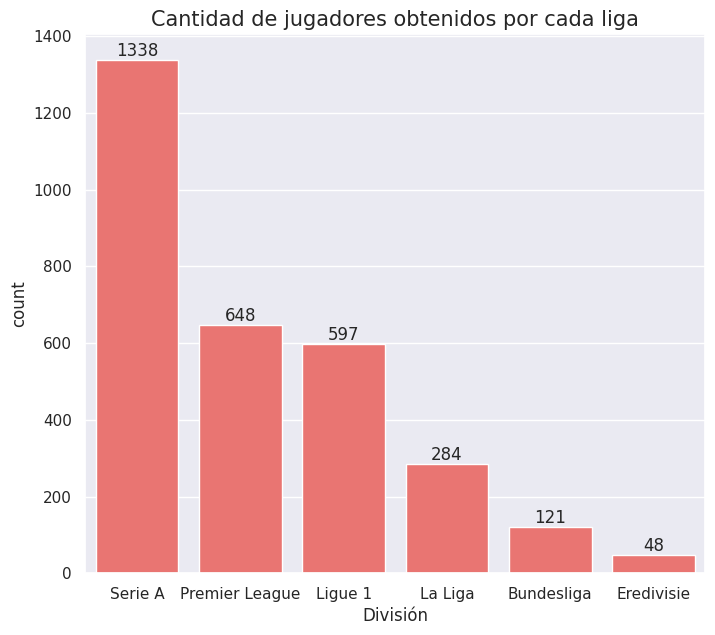

In [13]:
datosInf = datos.iloc[:,0:9]
datos_ordenados = datosInf['División'].value_counts(ascending=False).index
sns.set(rc={'figure.figsize':(8,7)})
ax = sns.countplot(x=datosInf['División'], order=datos_ordenados, color="#FD625E")
ax.set_title('Cantidad de jugadores obtenidos por cada liga', fontsize=15)
ax.bar_label(ax.containers[0])

# **Pre-procesamiento de datos** 💯

In [14]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datosML)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [15]:
list_names = [f'PC{i}' for i in range (1,48)]

In [16]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
modelo_dataframe = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datosML.columns,
    index   = list_names
)
#Muestra del dataframe creado en base a todos los componentes principales. Nota: en el siguiente
#cuadro solo se muestra los 3 primeros componentes, pues existen 47.
modelo_dataframe.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47
PC1,-0.175317,-0.138899,-0.085249,0.133733,-0.146004,-0.194011,-0.195274,-0.168661,-0.172060,-0.152686,0.144989,-0.175819,0.129341,0.143534,-0.188742,-0.187783,-0.162788,-0.191525,0.153709,-0.047116,-0.181727,-0.158396,-0.123728,0.139617,-0.081306,-0.176892,0.144649,-0.141254,0.122231,-0.167868,-0.121635,-0.071302,-0.200043,-0.026751,-0.182950,-0.120049,0.130027,-0.066729,-0.197171,-0.135996,0.154981,-0.151453,-0.017432,0.146725,-0.072778,-0.089790,-0.114017
PC2,0.097219,0.004190,0.234985,0.236706,0.116763,0.009418,0.022959,-0.033546,0.154687,0.063832,0.227315,0.047283,0.233670,0.218127,0.108506,0.102798,-0.035132,-0.016578,0.230067,0.068670,0.085467,0.105801,-0.009013,0.230349,0.115747,0.177319,0.213196,0.195880,0.197885,0.177255,-0.027391,0.091904,0.014799,0.105403,-0.032690,0.220801,0.230864,0.168303,0.023414,-0.015609,0.223026,0.180182,0.173278,0.227609,0.049277,0.088920,-0.017477
PC3,-0.106357,-0.084219,0.137934,-0.073172,-0.190910,-0.114458,-0.169141,-0.227412,-0.030177,0.124097,-0.077230,-0.158968,-0.072025,-0.078244,0.033986,0.042046,-0.219090,-0.199906,-0.077560,0.035008,-0.095713,-0.075934,0.364084,-0.077398,0.114020,0.055719,-0.076481,0.134825,-0.068835,0.051719,0.346782,0.021265,-0.140223,0.154497,-0.139859,0.109842,-0.073657,0.310943,-0.108785,0.214285,-0.076658,0.085900,0.188816,-0.075213,0.139379,-0.138509,-0.142951


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


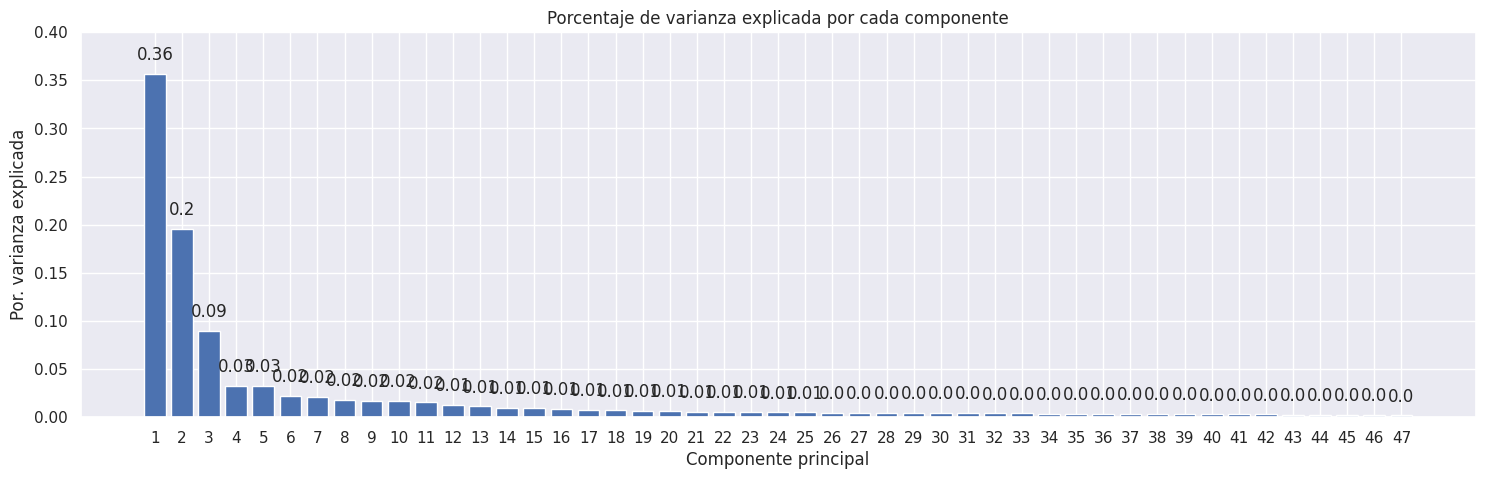

In [17]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_)+1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datosML.columns)) +1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) +1)
ax.set_ylim(0, 0.4)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [18]:
#FINALIZAR CUADRO
#https://interactivechaos.com/es/manual/tutorial-de-machine-learning/visualizacion-de-la-varianza-explicada

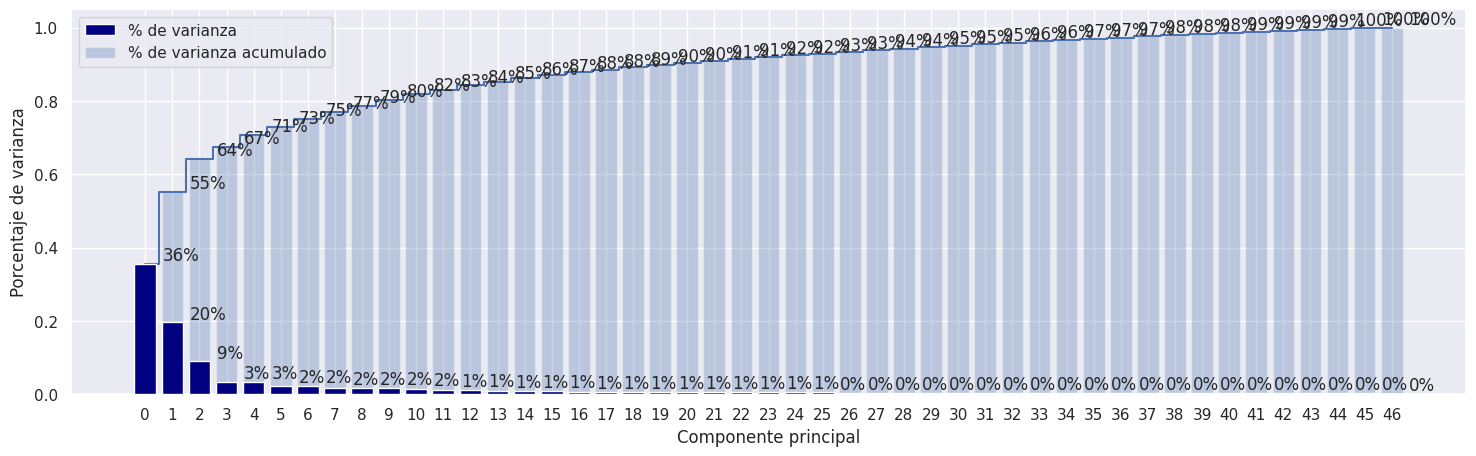

In [19]:
x_range = range(len(datosML.columns))
explainedvce = modelo_pca.explained_variance_ratio_
cum_explained_variance = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize = (18, 5))
ax.bar(x = x_range, height = explainedvce, zorder = 20,
       color = "navy", label = "% de varianza")
ax.bar(x = x_range, height = cum_explained_variance, alpha = 0.3,
       label = "% de varianza acumulado")
ax.step(x = x_range, y = cum_explained_variance, where = "mid")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Porcentaje de varianza")
for i, v in enumerate(explainedvce):
    ax.text(x = i + 0.65, y = v + 0.01, s = str(round(v * 100)) + "%")
for i, v in enumerate(cum_explained_variance[1:], start = 1):
    ax.text(x = i + 0.65, y = v + 0.01, s = str(round(v * 100)) + "%")
ax.set_xticks(x_range, labels = x_range)
ax.legend()
plt.show()

In [20]:
x_range

range(0, 47)

In [21]:
explainedvce

array([0.35640813, 0.19588297, 0.08942487, 0.03288854, 0.03247184,
       0.02227125, 0.02147078, 0.01785184, 0.01705172, 0.01699337,
       0.01545176, 0.0126964 , 0.01130754, 0.01010279, 0.00968724,
       0.00844281, 0.00744734, 0.00711286, 0.00631082, 0.00618525,
       0.00559149, 0.00552223, 0.00524078, 0.00512515, 0.0050505 ,
       0.00491002, 0.00460301, 0.00442245, 0.00428848, 0.00424644,
       0.00410888, 0.00402163, 0.00396091, 0.00379232, 0.00365088,
       0.00352969, 0.00326281, 0.0031356 , 0.00311958, 0.0030418 ,
       0.00301113, 0.00289574, 0.00281268, 0.0026205 , 0.00238663,
       0.0022976 , 0.00189094])

In [22]:
cum_explained_variance

array([0.35640813, 0.55229109, 0.64171596, 0.6746045 , 0.70707634,
       0.72934759, 0.75081837, 0.76867021, 0.78572193, 0.8027153 ,
       0.81816706, 0.83086346, 0.842171  , 0.8522738 , 0.86196104,
       0.87040385, 0.87785119, 0.88496405, 0.89127487, 0.89746012,
       0.90305161, 0.90857384, 0.91381462, 0.91893976, 0.92399027,
       0.92890028, 0.9335033 , 0.93792575, 0.94221423, 0.94646067,
       0.95056954, 0.95459118, 0.95855208, 0.96234441, 0.96599529,
       0.96952499, 0.9727878 , 0.9759234 , 0.97904298, 0.98208478,
       0.98509591, 0.98799164, 0.99080433, 0.99342483, 0.99581146,
       0.99810906, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35640813 0.55229109 0.64171596 0.6746045  0.70707634 0.72934759
 0.75081837 0.76867021 0.78572193 0.8027153  0.81816706 0.83086346
 0.842171   0.8522738  0.86196104 0.87040385 0.87785119 0.88496405
 0.89127487 0.89746012 0.90305161 0.90857384 0.91381462 0.91893976
 0.92399027 0.92890028 0.9335033  0.93792575 0.94221423 0.94646067
 0.95056954 0.95459118 0.95855208 0.96234441 0.96599529 0.96952499
 0.9727878  0.9759234  0.97904298 0.98208478 0.98509591 0.98799164
 0.99080433 0.99342483 0.99581146 0.99810906 1.        ]


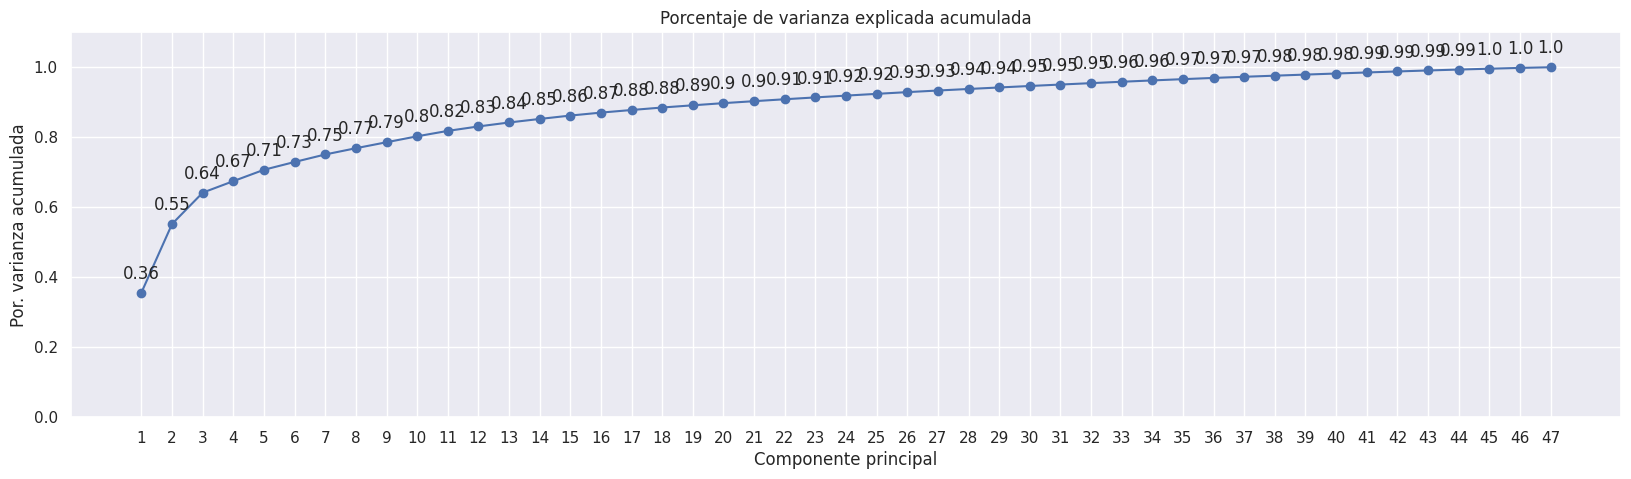

In [23]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.plot(
    np.arange(len(datosML.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datosML.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

[Text(0.5, 1.0, 'Mapa de calor de correlación de las variables')]

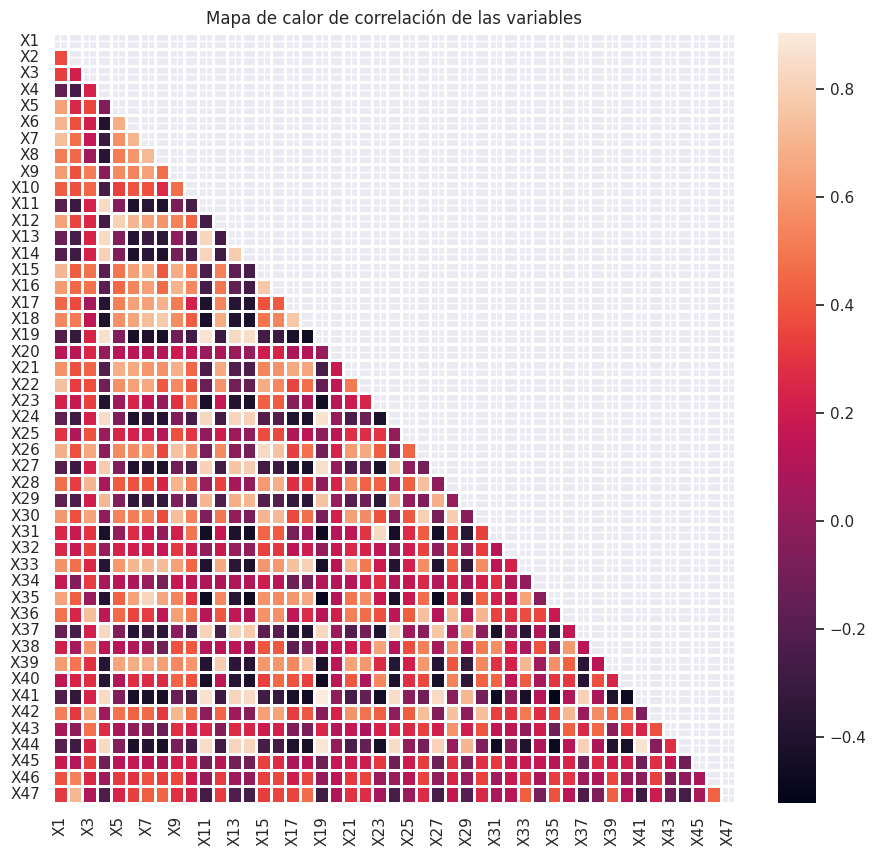

In [24]:
#Matriz de correlación de las variables (verificar que haya correlacion
#entre variables para aplicar PCA)
correlation= datosML.corr()
matrix = np.triu(correlation)
sns.set(rc={'figure.figsize':(11,10)})
sns.heatmap(correlation, mask=matrix, linewidths=1,
            linecolor='white').set(title='Mapa de calor de correlación de las variables')

In [25]:
#Estandarización de datos
scaler = StandardScaler()
data = scaler.fit_transform(datosML)
data = pd.DataFrame(data)

In [26]:
#PCA
pca = PCA(n_components=10)
pca.fit(data)
datos_transformados = pca.transform(data)

In [27]:
nombres = [f'PC{i}' for i in range (1,11)]
df = pd.DataFrame(datos_transformados,columns=nombres)
df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.087444,2.807989,-2.086394,1.481413,-0.435219,1.018643,0.030026,-1.732191,0.358923,0.836250
1,5.093016,13.281897,-2.251609,-0.801812,-1.709151,1.413252,2.018253,-1.175285,-0.177863,0.383045
2,-5.131197,2.392532,1.250334,-0.043522,-1.558046,-0.788564,-1.234149,2.043309,-0.874987,-1.353133


# **Modelos** ⏏

In [28]:
#Muestra
data_sample = data.sample(n = 1000)
sample_data = data_sample.to_numpy()

#PCA
pca02 = PCA(n_components=2)
pca02.fit(sample_data)
data_transform = pca02.transform(sample_data)

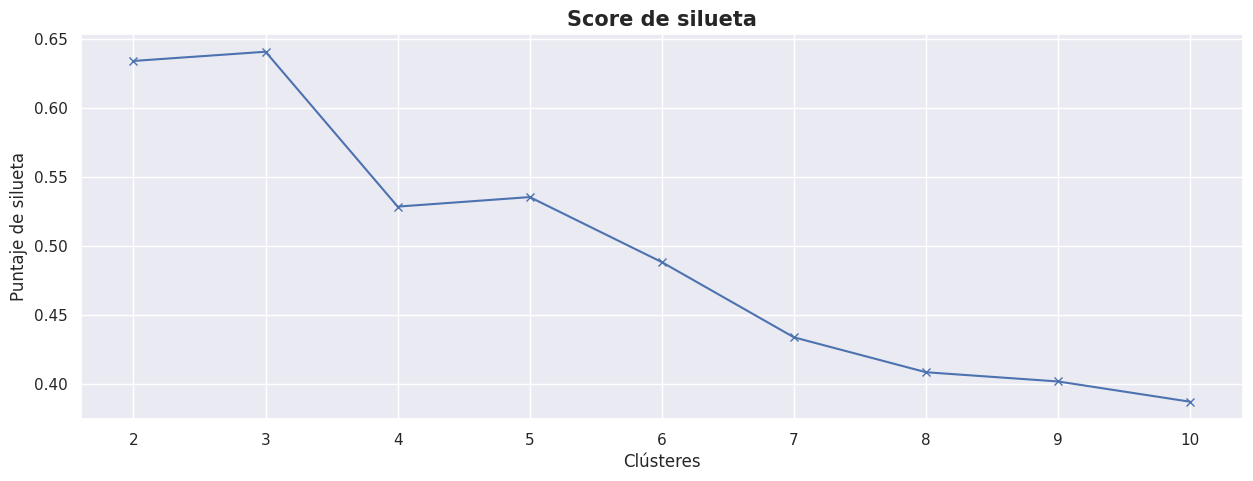

In [29]:
#Búsqueda de número de clústeres
silueta = []
rango = range(2,11)
for k in rango:
  k_means = KMeans(n_clusters = k).fit(data_transform)
  label = k_means.labels_
  silueta.append(silhouette_score(data_transform, label))

plt.figure(figsize=(15,5))
plt.plot(rango, silueta, 'bx-')
plt.xlabel('Clústeres', fontsize = 12)
plt.ylabel('Puntaje de silueta', fontsize = 12)
plt.title('Score de silueta', fontsize = 15,weight='bold')
plt.show()


Para n_clusters = 2 La puntuación de silueta media es : 0.49549968882725653
Para n_clusters = 3 La puntuación de silueta media es : 0.6406826787147673
Para n_clusters = 4 La puntuación de silueta media es : 0.5299525986337714
Para n_clusters = 5 La puntuación de silueta media es : 0.4626074164363084
Para n_clusters = 6 La puntuación de silueta media es : 0.4698706197413415


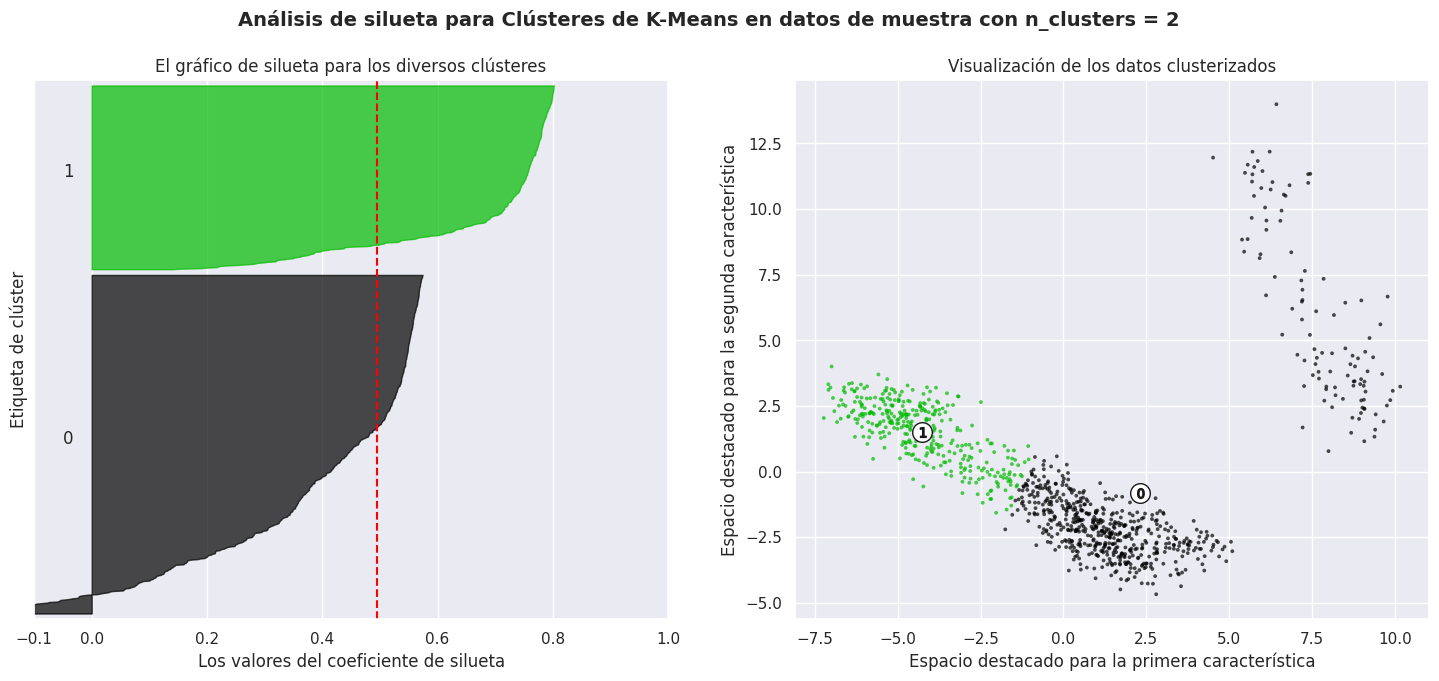

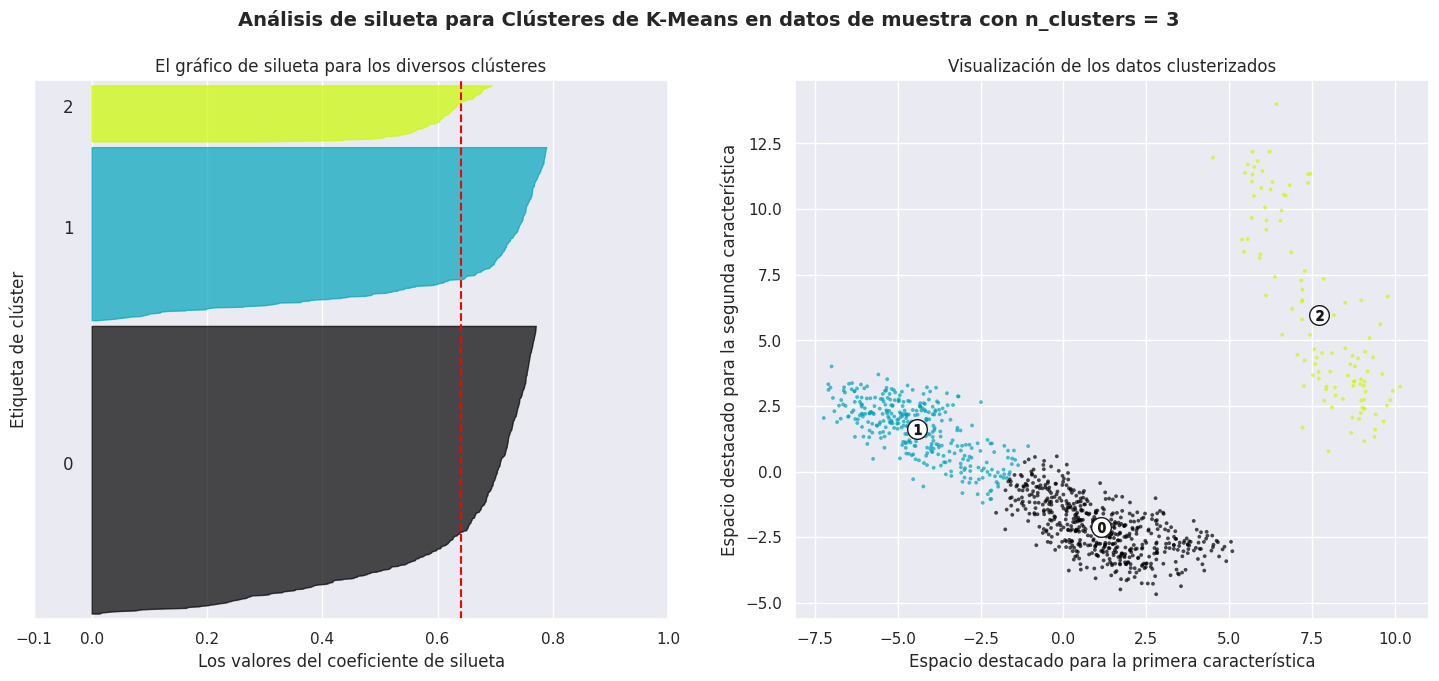

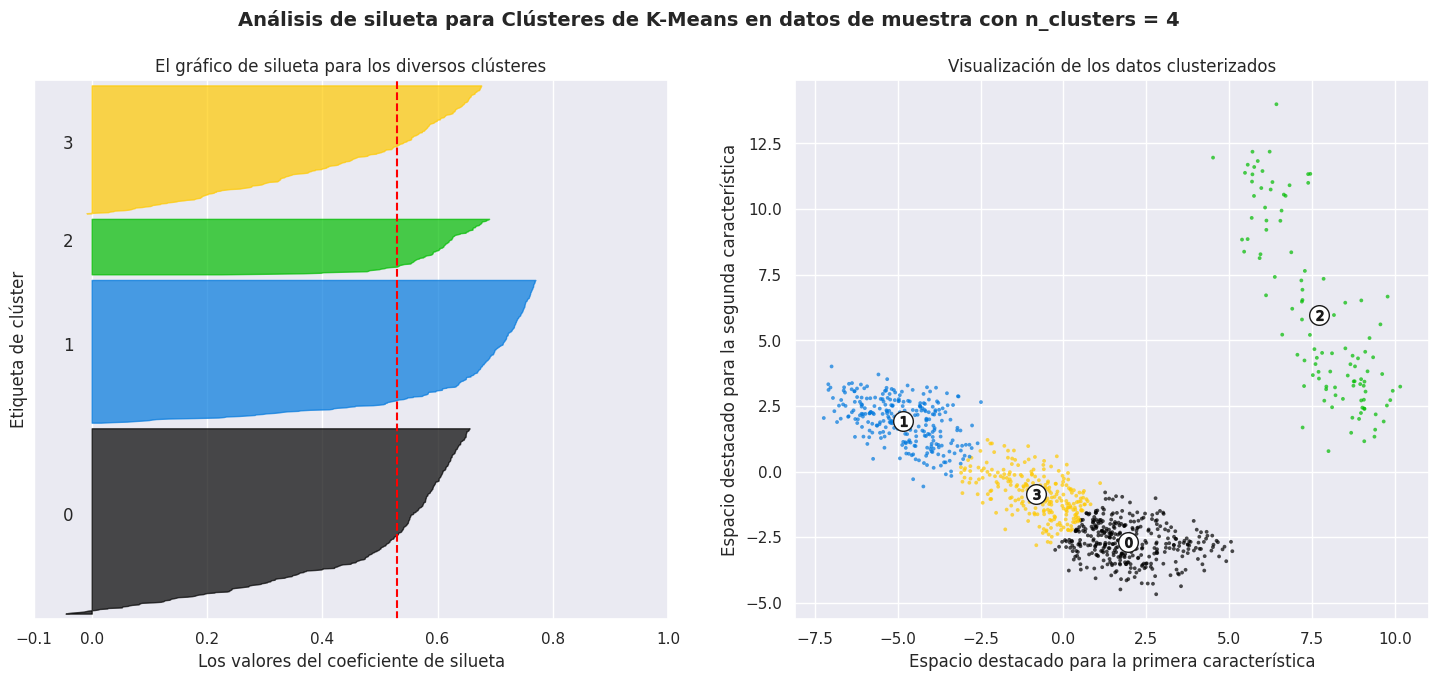

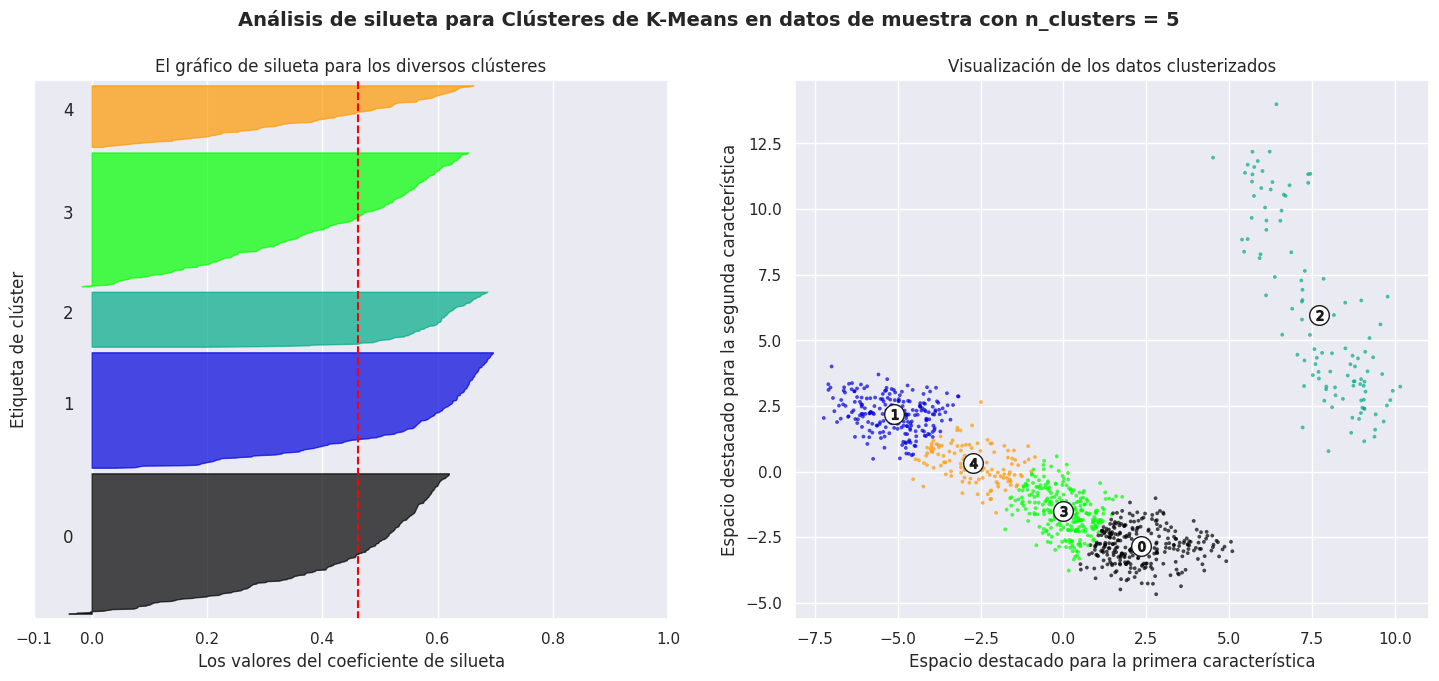

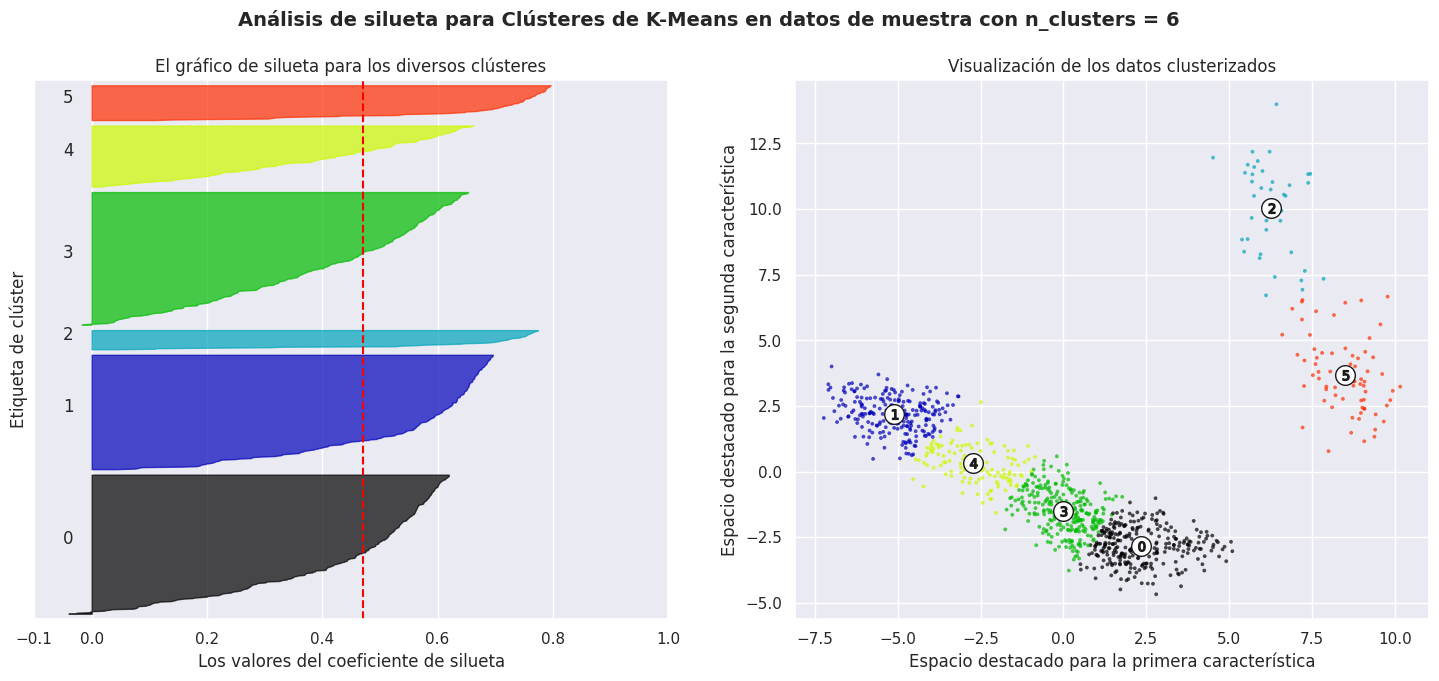

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
f = data_transform.copy()

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(f) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(f)

    silhouette_avg = silhouette_score(f, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La puntuación de silueta media es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(f, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("El gráfico de silueta para los diversos clústeres")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta de clúster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        f[:, 0], f[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualización de los datos clusterizados")
    ax2.set_xlabel("Espacio destacado para la primera característica")
    ax2.set_ylabel("Espacio destacado para la segunda característica")

    plt.suptitle(
        "Análisis de silueta para Clústeres de K-Means en datos de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [31]:
'''
#Busqueda de numero de clusters
lista_a = []
for i in range(1,11):
	kmeans = KMeans(n_clusters = i)
	kmeans.fit(df)
	lista_a.append(kmeans.inertia_)
'''

'\n#Busqueda de numero de clusters\nlista_a = []\nfor i in range(1,11):\n\tkmeans = KMeans(n_clusters = i)\n\tkmeans.fit(df)\n\tlista_a.append(kmeans.inertia_)\n'

## **1. MiniBatch K-Means**

In [32]:
MBdf = df.copy()
MBKM = MiniBatchKMeans(init ='k-means++', n_clusters = 3,
                      batch_size = 45, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
MBKM.fit(MBdf)

MiniBatchKMeans(batch_size=45, n_clusters=3, n_init=10)

In [33]:
print('El score de silueta de MiniBatch K-Means es',round(silhouette_score(MBdf,MBKM.labels_),4))

El score de silueta de MiniBatch K-Means es 0.3685


In [34]:
labels_minibatch = MBKM.labels_
calMiniBatch = metrics.calinski_harabasz_score(MBdf, labels_minibatch).round(4)
print('El Índice de Calinski-Harabasz de MiniBatch K-Means es',calMiniBatch)

El Índice de Calinski-Harabasz de MiniBatch K-Means es 2055.1387


In [35]:
davies_MiniBatch = davies_bouldin_score(MBdf, labels_minibatch).round(4)
print('El Índice de Davies-Bouldin de MiniBatch K-Means es', davies_MiniBatch)

El Índice de Davies-Bouldin de MiniBatch K-Means es 1.0135


## **2. Affinity Propagation**

In [36]:
APdf = df.copy()
AffP = AffinityPropagation(damping=0.9 ,affinity='euclidean' ,verbose=0, preference= -1000)
AffP.fit(APdf)

AffinityPropagation(damping=0.9, preference=-1000, verbose=0)

In [37]:
print('El score de silueta de Affinity Propagation es',round(silhouette_score(APdf,AffP.labels_, metric="sqeuclidean"),4))

El score de silueta de Affinity Propagation es 0.3158


In [38]:
labels_affp = AffP.labels_
calAffinity = metrics.calinski_harabasz_score(APdf, labels_affp).round(4)
print('El Índice de Calinski-Harabasz de Affinity Propagation es',calAffinity)

El Índice de Calinski-Harabasz de Affinity Propagation es 989.8056


In [39]:
davies_Affinity = davies_bouldin_score(APdf, labels_affp).round(4)
print('El Índice de Davies-Bouldin de Spectral Clustering es',davies_Affinity)

El Índice de Davies-Bouldin de Spectral Clustering es 1.635


## **3. Spectral Clustering**

In [40]:
Scdf = df.copy()
SC = SpectralClustering(n_clusters=3, affinity='rbf', assign_labels='kmeans')
SC.fit(Scdf)

SpectralClustering(n_clusters=3)

In [41]:
print('El score de silueta de Spectral Clustering es',round(silhouette_score(Scdf,SC.labels_),4))

El score de silueta de Spectral Clustering es 0.4336


In [42]:
labels_spectral = SC.labels_
calSpectral = metrics.calinski_harabasz_score(Scdf, labels_spectral).round(4)
print('El Índice de Calinski-Harabasz de Spectral Clustering es',calSpectral)

El Índice de Calinski-Harabasz de Spectral Clustering es 841.3015


In [43]:
davies_Spectral = davies_bouldin_score(Scdf, labels_spectral).round(4)
print('El Índice de Davies-Bouldin de Spectral Clustering es',davies_Spectral)

El Índice de Davies-Bouldin de Spectral Clustering es 0.7648


## **4. Ward**

In [44]:
AggCdf = df.copy()
AggCL = AgglomerativeClustering(n_clusters = 3)
AggCL.fit(AggCdf)

AgglomerativeClustering(n_clusters=3)

In [45]:
print('El score de silueta de Ward es',round(silhouette_score(AggCdf,AggCL.labels_),4))

El score de silueta de Ward es 0.3599


In [46]:
labels_ward = AggCL.labels_
calWard = metrics.calinski_harabasz_score(AggCdf, labels_ward).round(4)
print('El Índice de Calinski-Harabasz de Ward es',calWard)

El Índice de Calinski-Harabasz de Ward es 2007.6662


In [47]:
davies_Ward = davies_bouldin_score(AggCdf, labels_ward).round(4)
print('El Índice de Davies-Bouldin de Ward es',davies_Ward)

El Índice de Davies-Bouldin de Ward es 1.0254


## **5. Gaussian Mixture Model (EM)**

In [48]:
EMdf = df.copy()
EM = GaussianMixture(n_components=3,init_params='k-means++')
EM.fit(EMdf)
EMclustering = EM.predict(EMdf)

In [49]:
#Dataframe EM
EMdf['EM_clustering'] = EMclustering
EMdf.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,EM_clustering
0,-6.087444,2.807989,-2.086394,1.481413,-0.435219,1.018643,0.030026,-1.732191,0.358923,0.836250,1
1,5.093016,13.281897,-2.251609,-0.801812,-1.709151,1.413252,2.018253,-1.175285,-0.177863,0.383045,2
2,-5.131197,2.392532,1.250334,-0.043522,-1.558046,-0.788564,-1.234149,2.043309,-0.874987,-1.353133,1


In [50]:
print('El score de silueta de Expectation Maximization es',round(silhouette_score(EMdf,EMclustering),4))

El score de silueta de Expectation Maximization es 0.3482


In [51]:
labels_EM = EMclustering
calEM = metrics.calinski_harabasz_score(EMdf, labels_EM).round(4)
print('El Índice de Calinski-Harabasz de Expectation-Maximization es',calEM)

El Índice de Calinski-Harabasz de Expectation-Maximization es 1961.1982


In [52]:
davies_Em = davies_bouldin_score(EMdf, labels_EM).round(4)
print('El Índice Davies-Bouldin de Expectation-Maximization es',davies_Em)

El Índice Davies-Bouldin de Expectation-Maximization es 1.0544
